# World Population Analysis

<a id="1"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

<a id="2"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

* **Rank:** Rank by population
* **CCA3:** 3 digit Country/Territories code
* **Country:** Name of the Country/Territories
* **Capital:** Name of the Capital
* **Continent:** Name of the Continent
* **2022 Population:** Population of the Country/Territories in the year 2022
* **2020 Population:** Population of the Country/Territories in the year 2020
* **2015 Population:** Population of the Country/Territories in the year 2015
* **2010 Population:** Population of the Country/Territories in the year 2010
* **2000 Population:** Population of the Country/Territories in the year 2000
* **1990 Population:** Population of the Country/Territories in the year 1990
* **1980 Population:** Population of the Country/Territories in the year 1980
* **1970 Population:** Population of the Country/Territories in the year 1970
* **Area (km²):** Area size of the Country/Territories in square kilometer
* **Density (per km²):** Population density per square kilometer
* **Growth Rate:** Population growth rate by Country/Territories
* **World Population Percentage:** The population percentage by each Country/Territories

In [2]:
data = pd.read_csv("../input/world-population-dataset/world_population.csv")

<a id="3"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</p>


**Let's have a glimpse of the dataset.**

In [3]:
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head().style.set_properties(**{"background-color": "#006837","color":"#e9c46a","border": "1.5px solid black"})

Shape Of The Dataset : (234, 17)

Glimpse Of The Dataset :


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.058700,1.025700,0.520000
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.870200,0.995700,0.040000
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.853100,1.016400,0.560000
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.477400,0.983100,0.000000
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.564100,1.010000,0.000000


In [4]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    in

<a id="4"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>

In [5]:
print(f"Summary Of The Dataset :")
data.describe().style.set_properties(**{"background-color": "#006837","color":"#e9c46a","border": "1.5px solid black"})

Summary Of The Dataset :


,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,34074414.709402,33501070.952991,31729956.243590,29845235.034188,26269468.816239,22710220.790598,18984616.970085,15786908.807692,581449.384615,452.127044,1.009577,0.427051
std,67.694165,136766424.804763,135589876.924439,130404992.751760,124218487.632998,111698206.719070,97832173.346751,81785186.084201,67795091.643236,1761840.864063,2066.121904,0.013385,1.714977
min,1.000000,510.000000,520.000000,564.000000,596.000000,651.000000,700.000000,733.000000,752.000000,1.000000,0.026100,0.912000,0.000000
25%,59.250000,419738.500000,415284.500000,404676.000000,393149.000000,327242.000000,264115.750000,229614.250000,155997.000000,2650.000000,38.417875,1.001775,0.010000
50%,117.500000,5559944.500000,5493074.500000,5307400.000000,4942770.500000,4292907.000000,3825409.500000,3141145.500000,2604830.000000,81199.500000,95.346750,1.007900,0.070000
75%,175.750000,22476504.750000,21447979.500000,19730853.750000,19159567.500000,15762301.000000,11869231.000000,9826053.750000,8817329.000000,430425.750000,238.933250,1.016950,0.280000
max,234.000000,1425887337.000000,1424929781.000000,1393715448.000000,1348191368.000000,1264099069.000000,1153704252.000000,982372466.000000,822534450.000000,17098242.000000,23172.266700,1.069100,17.880000


In [6]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#006837","color":"#e9c46a","border": "1.5px solid black"})

,count,unique,top,freq
CCA3,234,234,AFG,1
Country/Territory,234,234,Afghanistan,1
Capital,234,234,Kabul,1
Continent,234,6,Africa,57


In [7]:
print(f"Null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#006837","color":"#e9c46a","border": "1.5px solid black"})

Null values of the Dataset :


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Insights:**

* There is no missing values in this dataset.
* We will encode the categorical features into numerical form later.


<a id="5"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualization</p>

In [8]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#D5CE98","figure.facecolor":"#D5CE98"})
sns.set_context("poster",font_scale = .7)

palette = ["#006837","#1A9850","#66BD63","#A6D96A","#D9EF8B","#FFFFBF","#FEE08B","#FDAE61","#F46D43","#D73027","#A50026"]
palette_cmap = ["#A50026","#D73027","#F46D43","#FDAE61","#FEE08B","#FFFFBF","#D9EF8B","#A6D96A","#66BD63","#1A9850","#006837"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

<a id="6"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Population</p>

Let's have a look on the population :


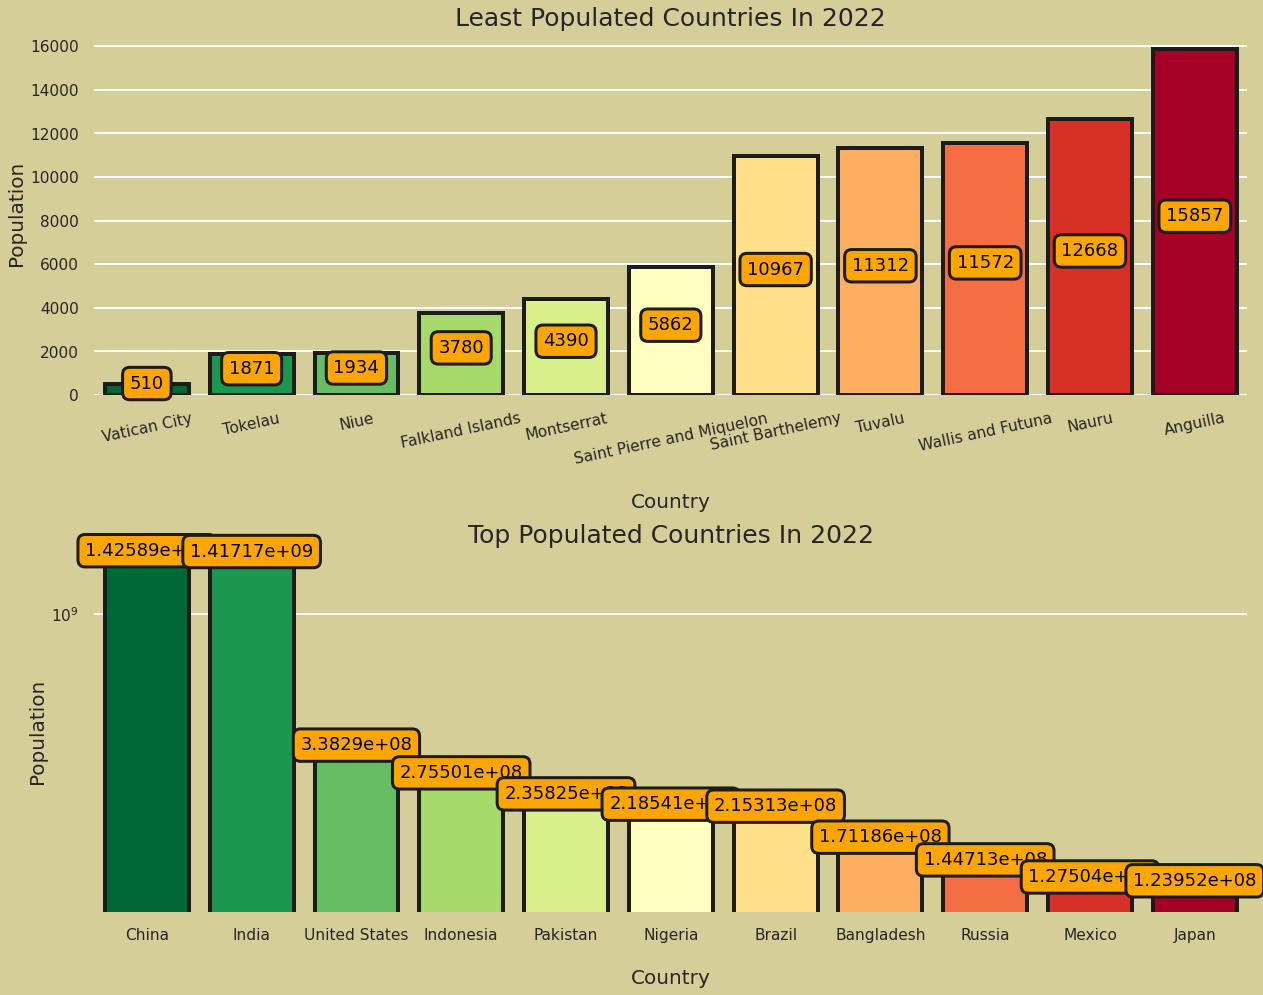

In [9]:
print(f"Let's have a look on the population :")
_, axs = plt.subplots(2,1,figsize=(20,16))
plt.tight_layout(pad=7.0)

sns.barplot(x=data["Country/Territory"],y=data["2022 Population"],order=data.sort_values("2022 Population",ascending=True)["Country/Territory"][:11],ax=axs[0],palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[0].set_yscale("linear")
axs[0].set_title("Least Populated Countries In 2022",fontsize=25)
axs[0].set_xlabel("\nCountry",fontsize=20)
axs[0].set_ylabel("Population",fontsize=20)
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 12)
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})


sns.barplot(x=data["Country/Territory"],y=data["2022 Population"],order=data.sort_values("2022 Population",ascending=False)["Country/Territory"][:11],ax=axs[1],palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[1].set_yscale("log")
axs[1].set_title("Top Populated Countries In 2022",fontsize=25)
axs[1].set_xlabel("\nCountry",fontsize=20)
axs[1].set_ylabel("Population",fontsize=20)
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 0)
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* China is the most densely populated country with 1.4B people followed by India, United States and others.
* Vatican City is the least populated country with 510 people followed by Tokelau, Niue and others.

Let's have a look on the continent-wise population in 2022 :


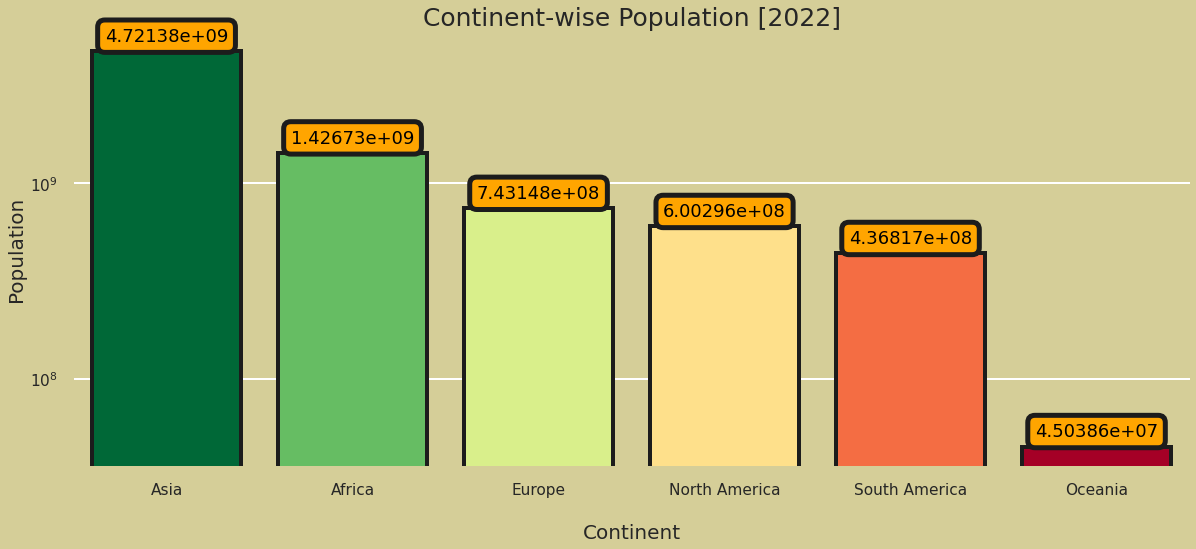

In [10]:
data_pop = data.copy()
data_pop = pd.DataFrame(data_pop.groupby(["Continent"])["1970 Population","1980 Population","1990 Population","2000 Population","2010 Population","2015 Population","2020 Population","2022 Population"].sum())

print("Let's have a look on the continent-wise population in 2022 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(x=data_pop.index, y=data_pop["2022 Population"],order=data_pop.sort_values("2022 Population",ascending=False).index,palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Continent-wise Population [2022]",fontsize=25)
p.set_xlabel("\nContinent",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Asia is the most densely populated continent with 4.7B people followed by Africa, Europe and others.


Let's have a look on the ratios of continent-wise population in 2022 :


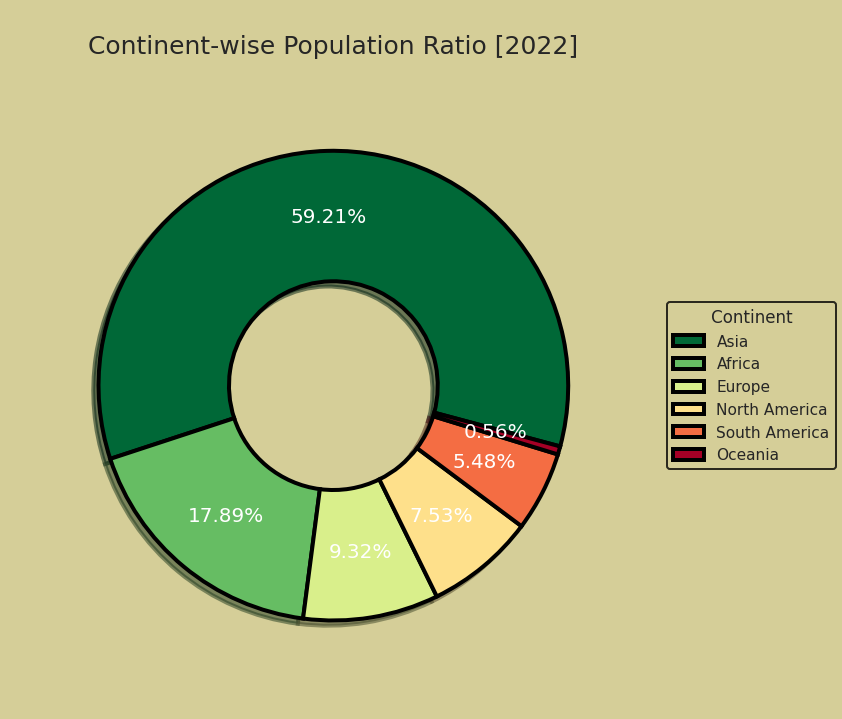

In [11]:
print(f"Let's have a look on the ratios of continent-wise population in 2022 :")
plt.subplots(figsize=(12, 12))

labels = "Asia","Africa","Europe","North America","South America","Oceania"
size = 0.5

wedges, texts, autotexts = plt.pie([data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][0],
                                    data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][1],
                                    data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][2],
                                    data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][3],
                                    data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][4],
                                    data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][5]],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:11:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -15)

plt.legend(wedges, labels, title="Continent",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nContinent-wise Population Ratio [2022]",fontsize=25)
plt.show()

**Insights:**

* In world population 59.21% from Asia, 17.89% from Africa, 9.32% from Europe,7.53% from North America, 5.48% from South America and 0.56% from Oceania.


Population in Asia in 2022 :


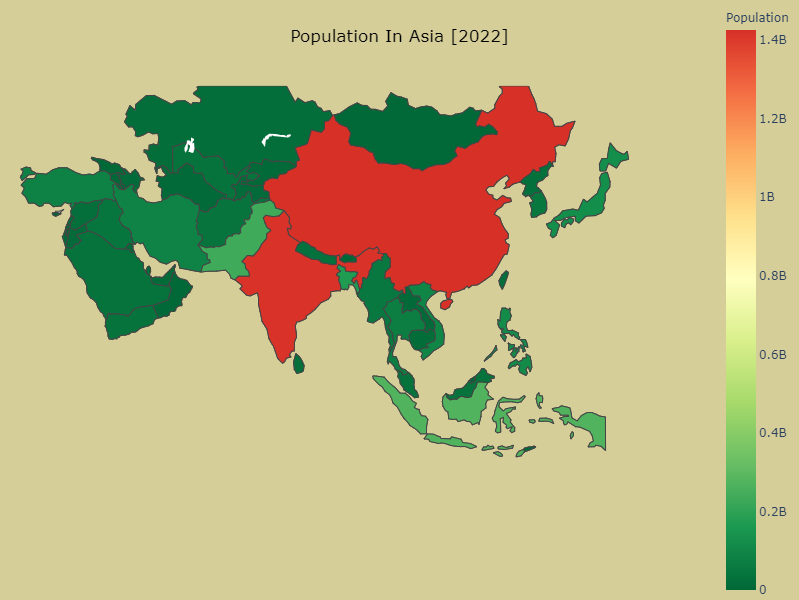

In [12]:
print("Population in Asia in 2022 :")

fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    color_continuous_scale=palette[:10],height= 600,scope="asia",
                    labels={"2022 Population":"Population"})


fig.update_layout(title=dict(text= "Population In Asia [2022]",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

Population in Asia in 2022 :


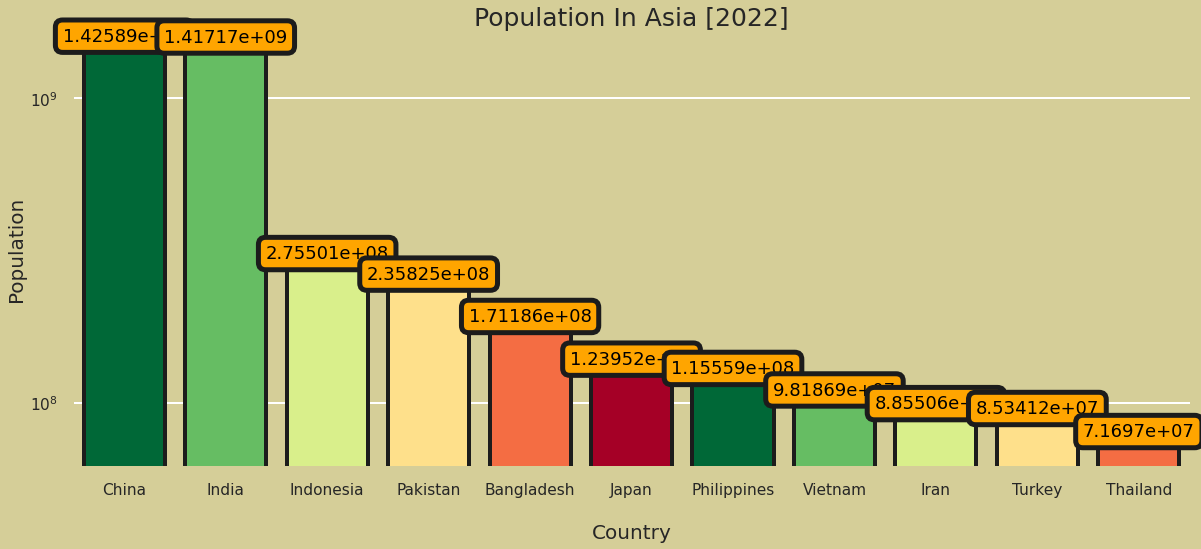

In [13]:
print("Population in Asia in 2022 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["Continent"]=="Asia"],x="Country/Territory", y="2022 Population",order=data[data["Continent"]=="Asia"].sort_values("2022 Population",ascending=False)["Country/Territory"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In Asia [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* China is leading in Asia with 1.42B people followed by India, Indonesia and other countries.

Population in Africa in 2022 :


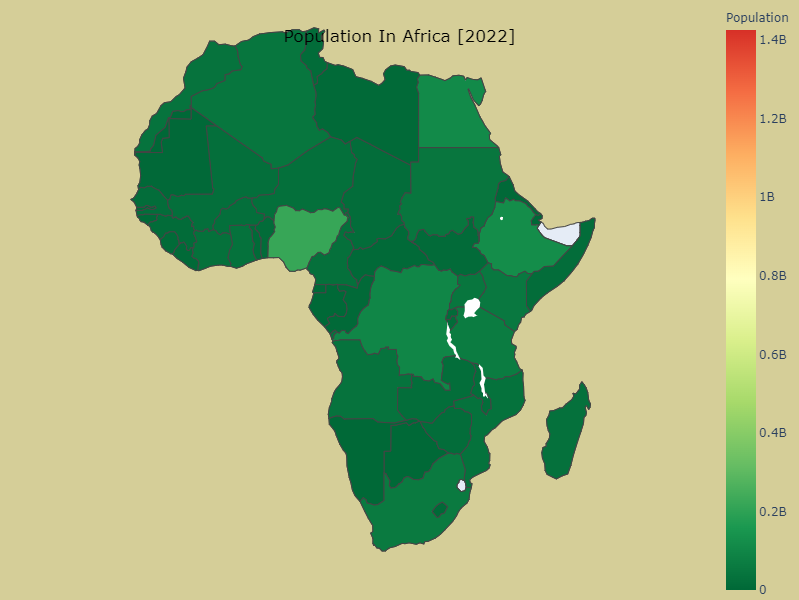

In [14]:
print("Population in Africa in 2022 :")

fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    color_continuous_scale=palette[:10],height= 600,scope="africa",
                    labels={"2022 Population":"Population"})


fig.update_layout(title=dict(text= "Population In Africa [2022]",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

Population in Africa in 2022 :


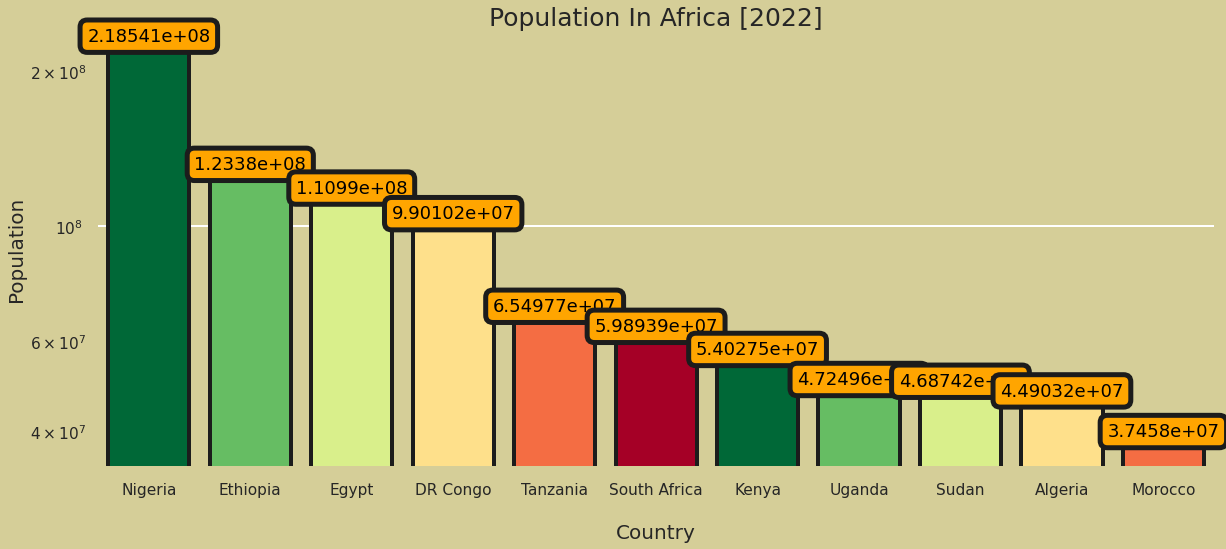

In [15]:
print("Population in Africa in 2022 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["Continent"]=="Africa"],x="Country/Territory", y="2022 Population",order=data[data["Continent"]=="Africa"].sort_values("2022 Population",ascending=False)["Country/Territory"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In Africa [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Nigeria is leading in Africa with 218.5M people followed by Ethiopia, Egypt and other countries.

Population in Europe in 2022 :


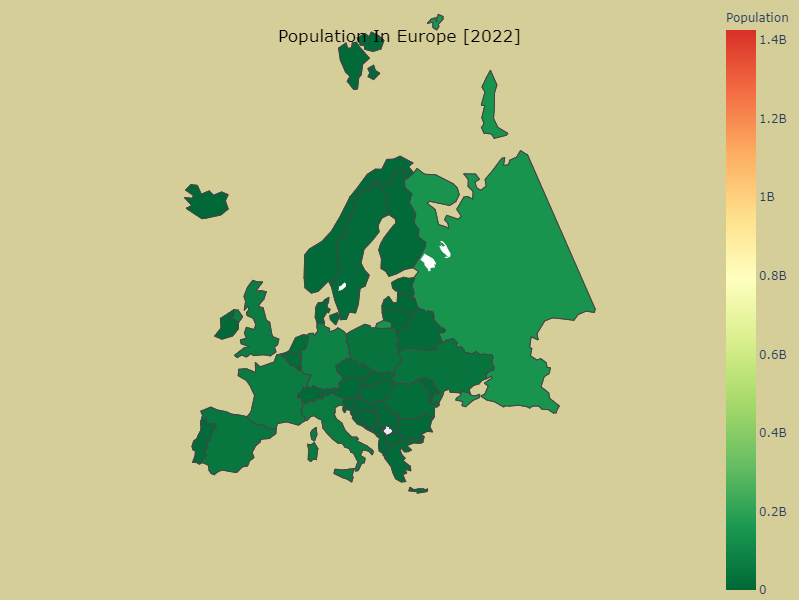

In [16]:
print("Population in Europe in 2022 :")

fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    color_continuous_scale=palette[:10],height= 600,scope="europe",
                    labels={"2022 Population":"Population"})


fig.update_layout(title=dict(text= "Population In Europe [2022]",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

Population in Europe in 2022 :


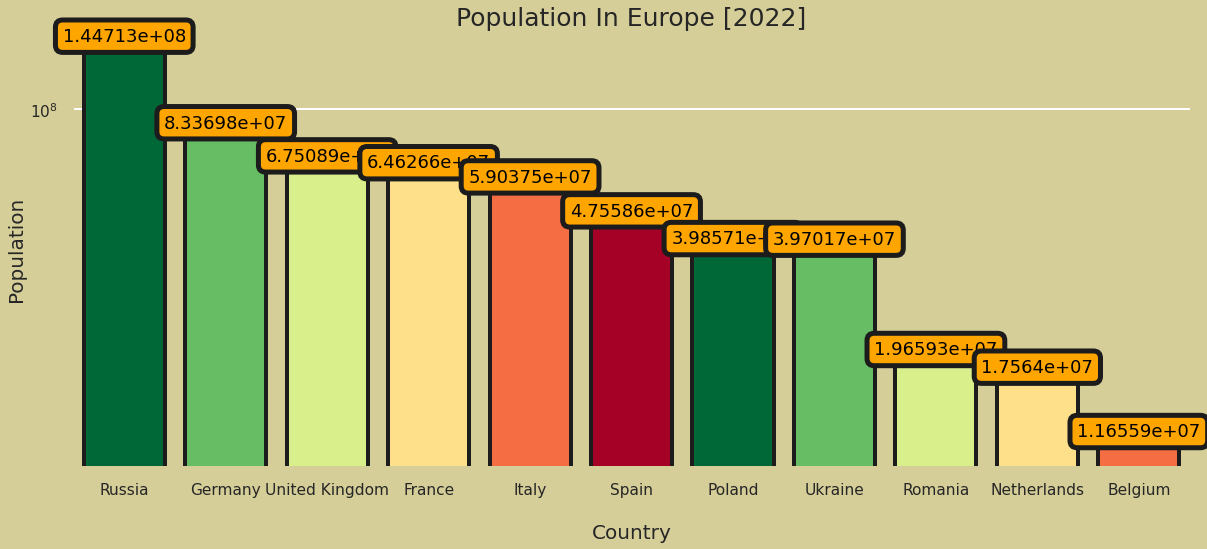

In [17]:
print("Population in Europe in 2022 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["Continent"]=="Europe"],x="Country/Territory", y="2022 Population",order=data[data["Continent"]=="Europe"].sort_values("2022 Population",ascending=False)["Country/Territory"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In Europe [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Russia is leading in Europe with 144.7M people followed by Germany, United Kingdom and other countries.

Population in North America in 2022 :


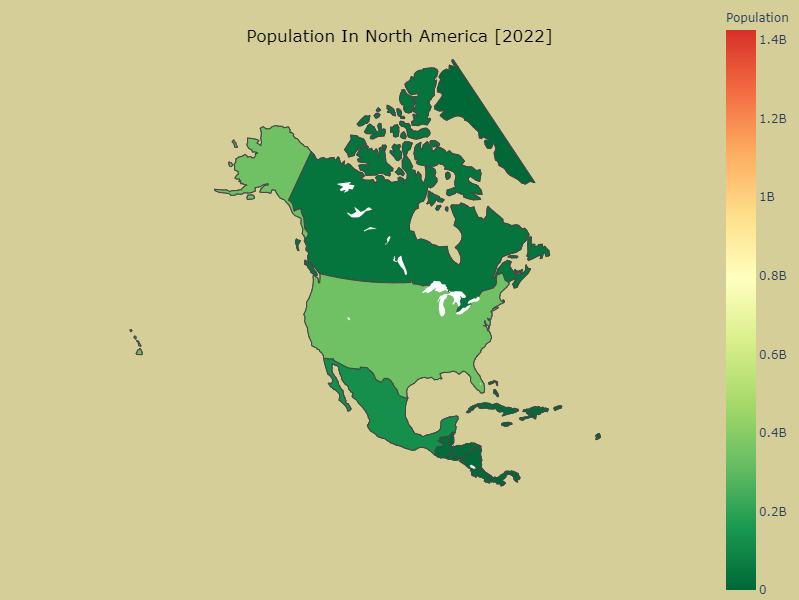

In [18]:
print("Population in North America in 2022 :")

fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    color_continuous_scale=palette[:10],height= 600,scope="north america",
                    labels={"2022 Population":"Population"})


fig.update_layout(title=dict(text= "Population In North America [2022]",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

Population in North America in 2022 :


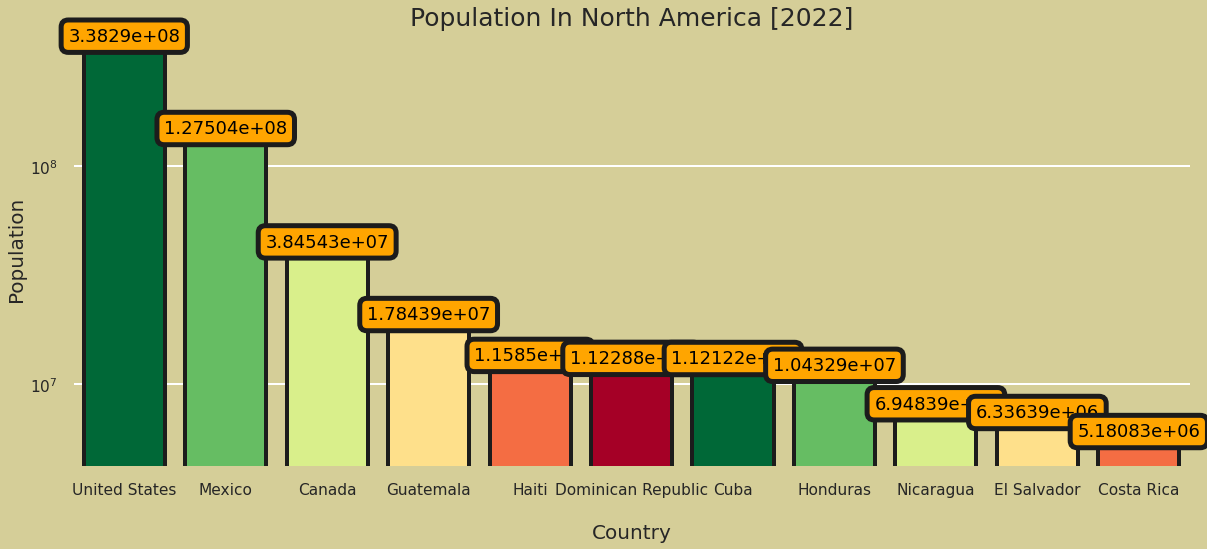

In [19]:
print("Population in North America in 2022 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["Continent"]=="North America"],x="Country/Territory", y="2022 Population",order=data[data["Continent"]=="North America"].sort_values("2022 Population",ascending=False)["Country/Territory"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In North America [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* United States is leading in North America with 338.3M people followed by Mexico, Canada and other countries.

Population in Souh America in 2022 :


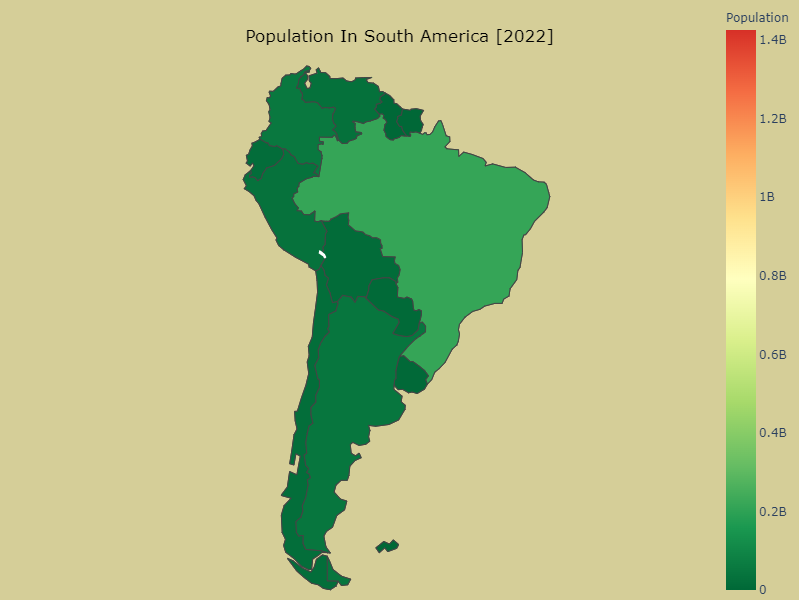

In [20]:
print("Population in Souh America in 2022 :")

fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    color_continuous_scale=palette[:10],height= 600,scope="south america",
                    labels={"2022 Population":"Population"})


fig.update_layout(title=dict(text= "Population In South America [2022]",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

Population in South America in 2022 :


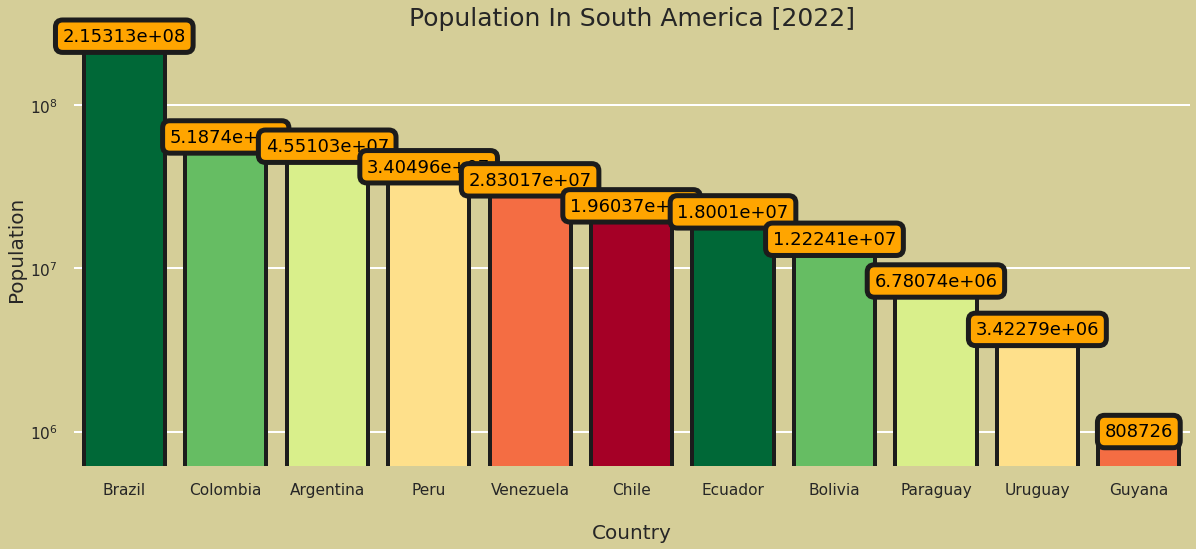

In [21]:
print("Population in South America in 2022 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["Continent"]=="South America"],x="Country/Territory", y="2022 Population",order=data[data["Continent"]=="South America"].sort_values("2022 Population",ascending=False)["Country/Territory"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In South America [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Brazil is leading in South America with 215.3M people followed by Colombia, Argentina and other countries.

Let's have a look on the timeline of continent-wise population :


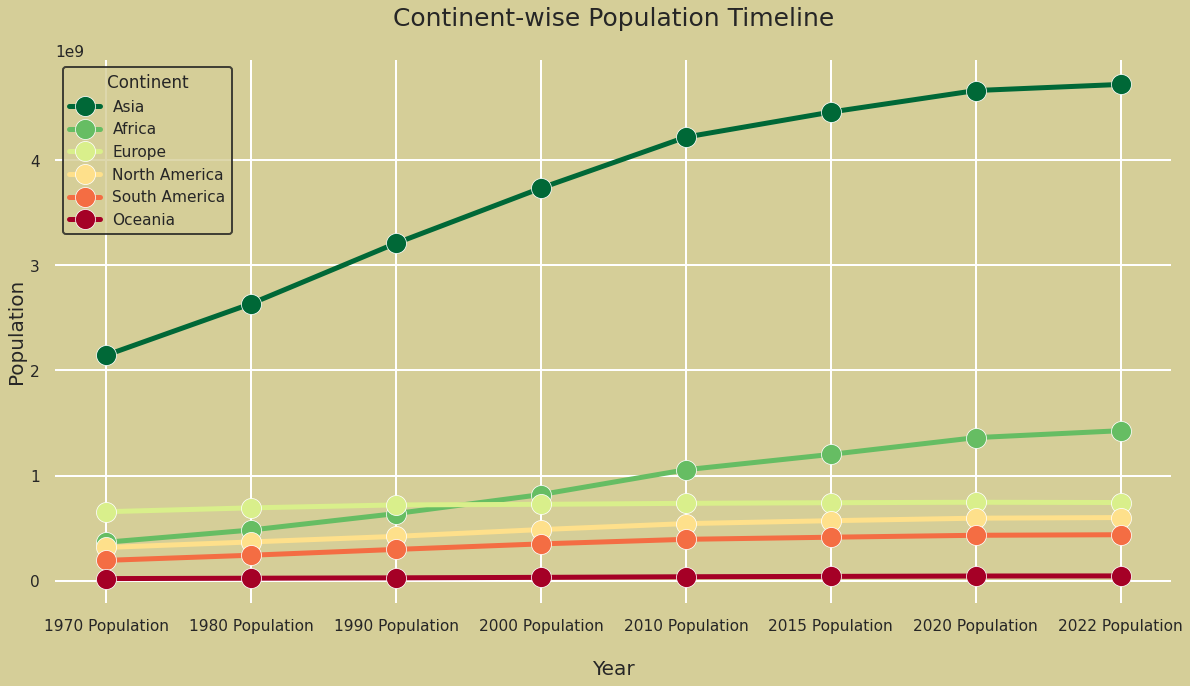

In [22]:
print(f"Let's have a look on the timeline of continent-wise population :")
_, axs = plt.subplots(figsize=(20,10))

sns.lineplot(x=data_pop.T.index ,y=data_pop.T["Asia"],data=data_pop.T,ax=axs,color="#006837",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["Africa"],data=data_pop.T,ax=axs,color="#66BD63",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["Europe"],data=data_pop.T,ax=axs,color="#D9EF8B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["North America"],data=data_pop.T,ax=axs,color="#FEE08B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["South America"],data=data_pop.T,ax=axs,color="#F46D43",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["Oceania"],data=data_pop.T,ax=axs,color="#A50026",marker="o",linewidth=5,markersize=20)

axs.set_title("Continent-wise Population Timeline\n",fontsize=25)
axs.set_xlabel("\nYear",fontsize=20)
axs.set_ylabel("Population",fontsize=20)
axs.legend(["Asia","Africa","Europe","North America","South America","Oceania"],title="Continent", edgecolor = "#1c1c1c")
# axs.set_xticks([],minor=False)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* In every continent population is increasing by time.
* Population of Asia is increasing highly followed by Africa.


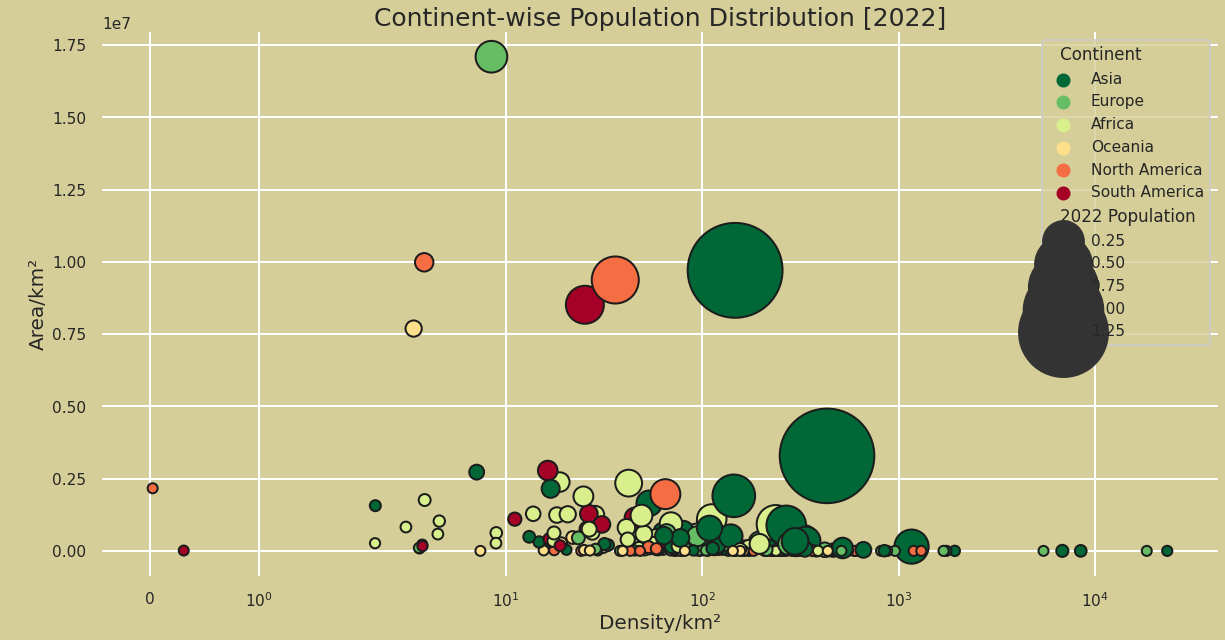

In [23]:
plt.subplots(figsize=(20,10))
p=sns.scatterplot(x=data["Density (per km²)"], y=data["Area (km²)"], hue=data["Continent"],size=data["2022 Population"],palette=palette[0:11:2], edgecolor = "#1c1c1c", linewidth = 2,sizes=(100, 9000),alpha=1)
p.set_xscale("symlog")
p.set_yscale("linear")
p.set_title("Continent-wise Population Distribution [2022]",fontsize=25)
p.set_xlabel("Density/km²",fontsize=20)
p.set_ylabel("\nArea/km²",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Almost every Asian country has high population with high population density/km².

<a id="7"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Population Density</p>

Let's have a look on the distribution of population density :


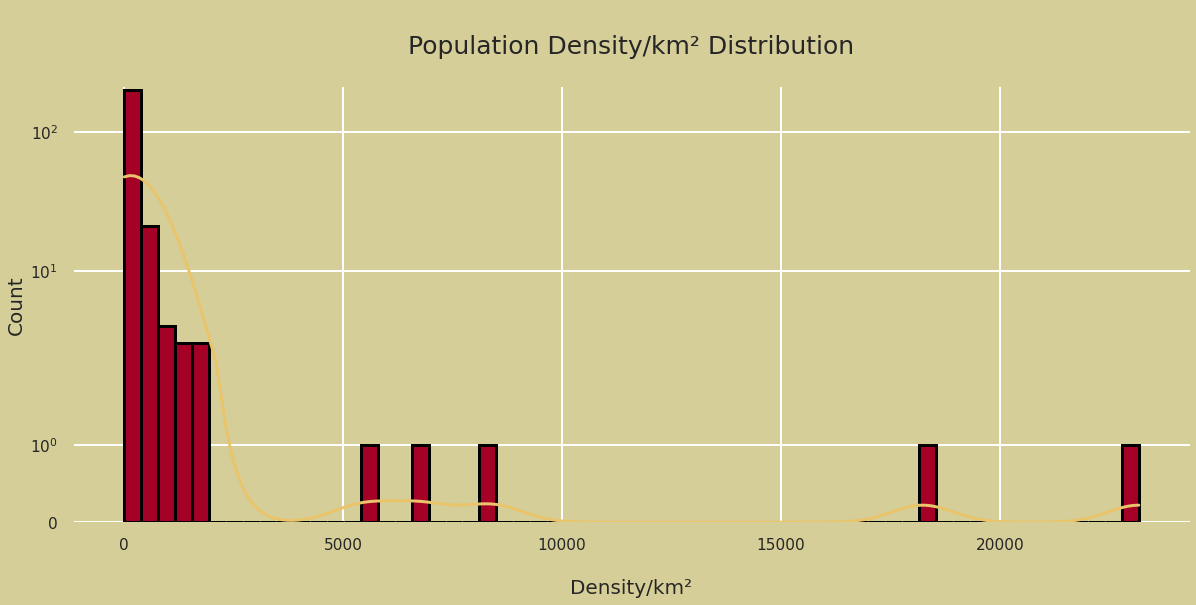

In [24]:
print(f"Let's have a look on the distribution of population density :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["Density (per km²)"],color=["#A50026"],kde=True,bins=60,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("#e9c46a")
p.axes.set_yscale("symlog")
p.axes.set_title("\nPopulation Density/km² Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nDensity/km²",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

* Almost all country have population density/km² in between 0 to 2000.

Let's have a look on the population density :


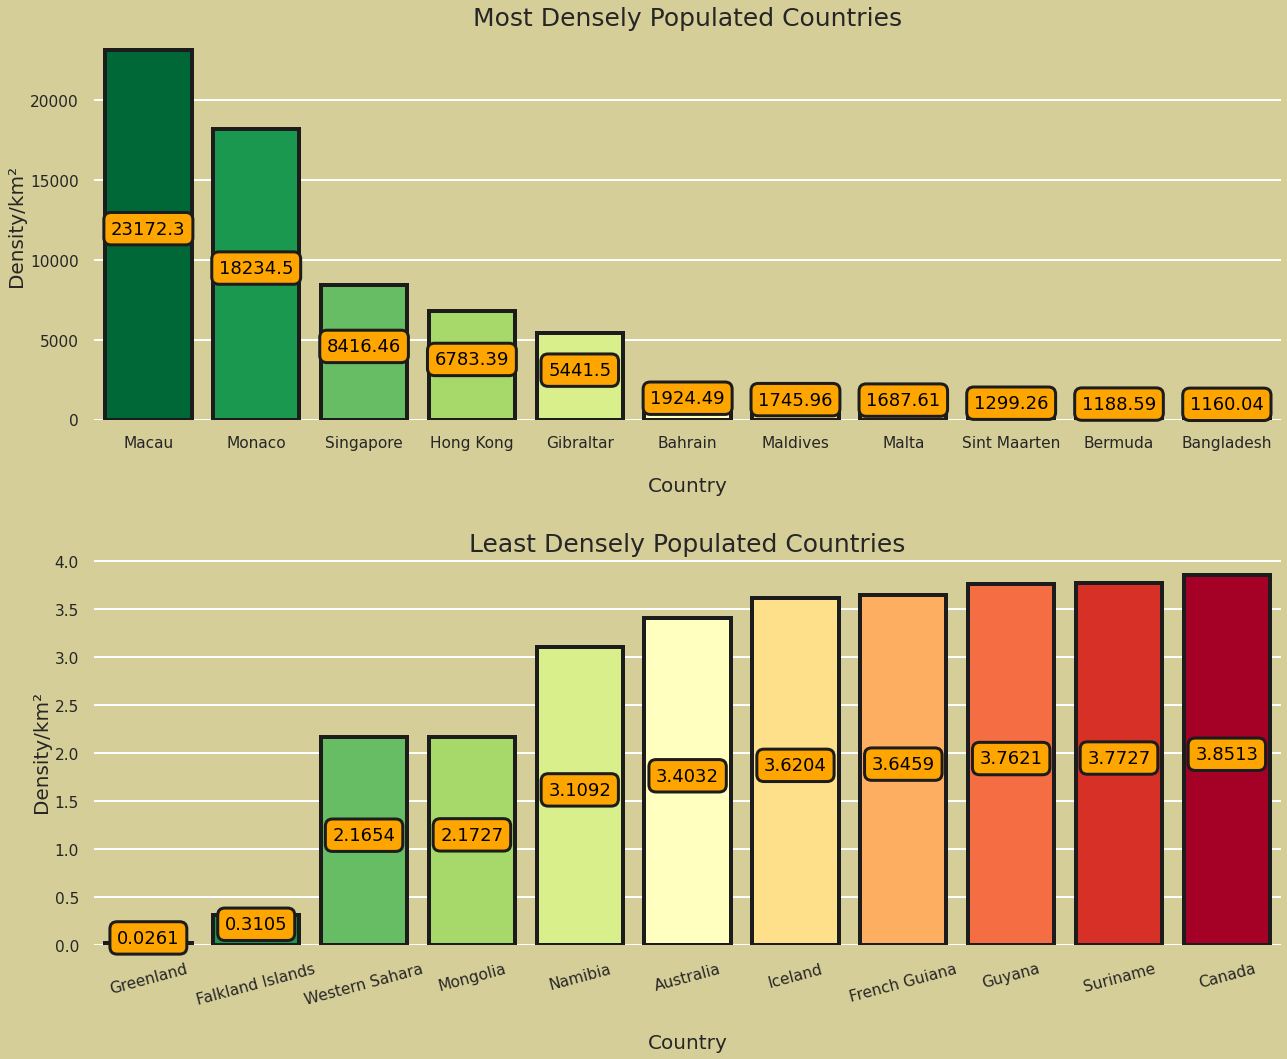

In [25]:
print(f"Let's have a look on the population density :")
_, axs = plt.subplots(2,1,figsize=(20,16))
plt.tight_layout(pad=6.0)

sns.barplot(x=data["Country/Territory"],y=data["Density (per km²)"],order=data.sort_values("Density (per km²)",ascending=False)["Country/Territory"][:11],ax=axs[0],palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[0].set_yscale("linear")
axs[0].set_title("Most Densely Populated Countries",fontsize=25)
axs[0].set_xlabel("\nCountry",fontsize=20)
axs[0].set_ylabel("Density/km²",fontsize=20)
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 0)
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.barplot(x=data["Country/Territory"],y=data["Density (per km²)"],order=data.sort_values("Density (per km²)",ascending=True)["Country/Territory"][:11],ax=axs[1],palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[1].set_yscale("linear")
axs[1].set_title("Least Densely Populated Countries",fontsize=25)
axs[1].set_xlabel("\nCountry",fontsize=20)
axs[1].set_ylabel("Density/km²",fontsize=20)
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 15)
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Macau is the most densely populated country with more than 23172 people in per square kilometer followed by Monaco, Singapore and others.
* Greenland is the least densely populated country with 0.0261 people in per square kilometer followed by Falkland Island, Western Sahara and others.

Let's have a look on the timeline of continent-wise population density :


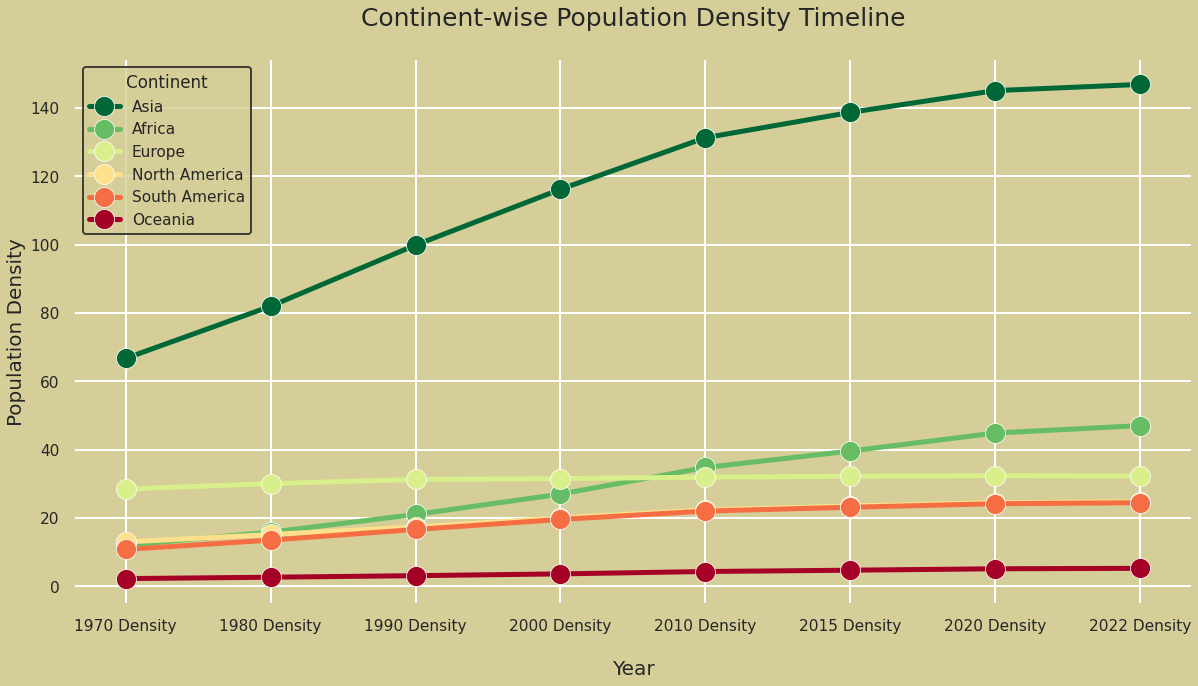

In [26]:
data_den = data.copy()
data_den = pd.DataFrame(data_den.groupby(["Continent"])["1970 Population","1980 Population","1990 Population","2000 Population","2010 Population","2015 Population","2020 Population","2022 Population","Area (km²)"].sum())
col = ["1970 Population","1980 Population","1990 Population","2000 Population","2010 Population","2015 Population","2020 Population","2022 Population"]
for i in col:
    data_den[i] = data_den[i]/data_den["Area (km²)"]    
data_den.rename(columns={"1970 Population":"1970 Density","1980 Population":"1980 Density","1990 Population":"1990 Density","2000 Population":"2000 Density","2010 Population":"2010 Density","2015 Population":"2015 Density","2020 Population":"2020 Density","2022 Population":"2022 Density"},inplace=True)
data_den.drop(columns="Area (km²)",inplace=True)


print(f"Let's have a look on the timeline of continent-wise population density :")
_, axs = plt.subplots(figsize=(20,10))

sns.lineplot(x=data_den.T.index ,y=data_den.T["Asia"],data=data_den.T,ax=axs,color="#006837",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Africa"],data=data_den.T,ax=axs,color="#66BD63",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Europe"],data=data_den.T,ax=axs,color="#D9EF8B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["North America"],data=data_den.T,ax=axs,color="#FEE08B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["South America"],data=data_den.T,ax=axs,color="#F46D43",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Oceania"],data=data_den.T,ax=axs,color="#A50026",marker="o",linewidth=5,markersize=20)

axs.set_title("Continent-wise Population Density Timeline\n",fontsize=25)
axs.set_xlabel("\nYear",fontsize=20)
axs.set_ylabel("Population Density",fontsize=20)
axs.legend(["Asia","Africa","Europe","North America","South America","Oceania"],title="Continent", edgecolor = "#1c1c1c")
# axs.set_xticks([],minor=False)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* In every continent population density/km² is increasing by time.
* Population density/km² of Asia is increasing highly followed by Africa.

<a id="8"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Population Growth Rate</p>

Let's have a look on the population growth rate :


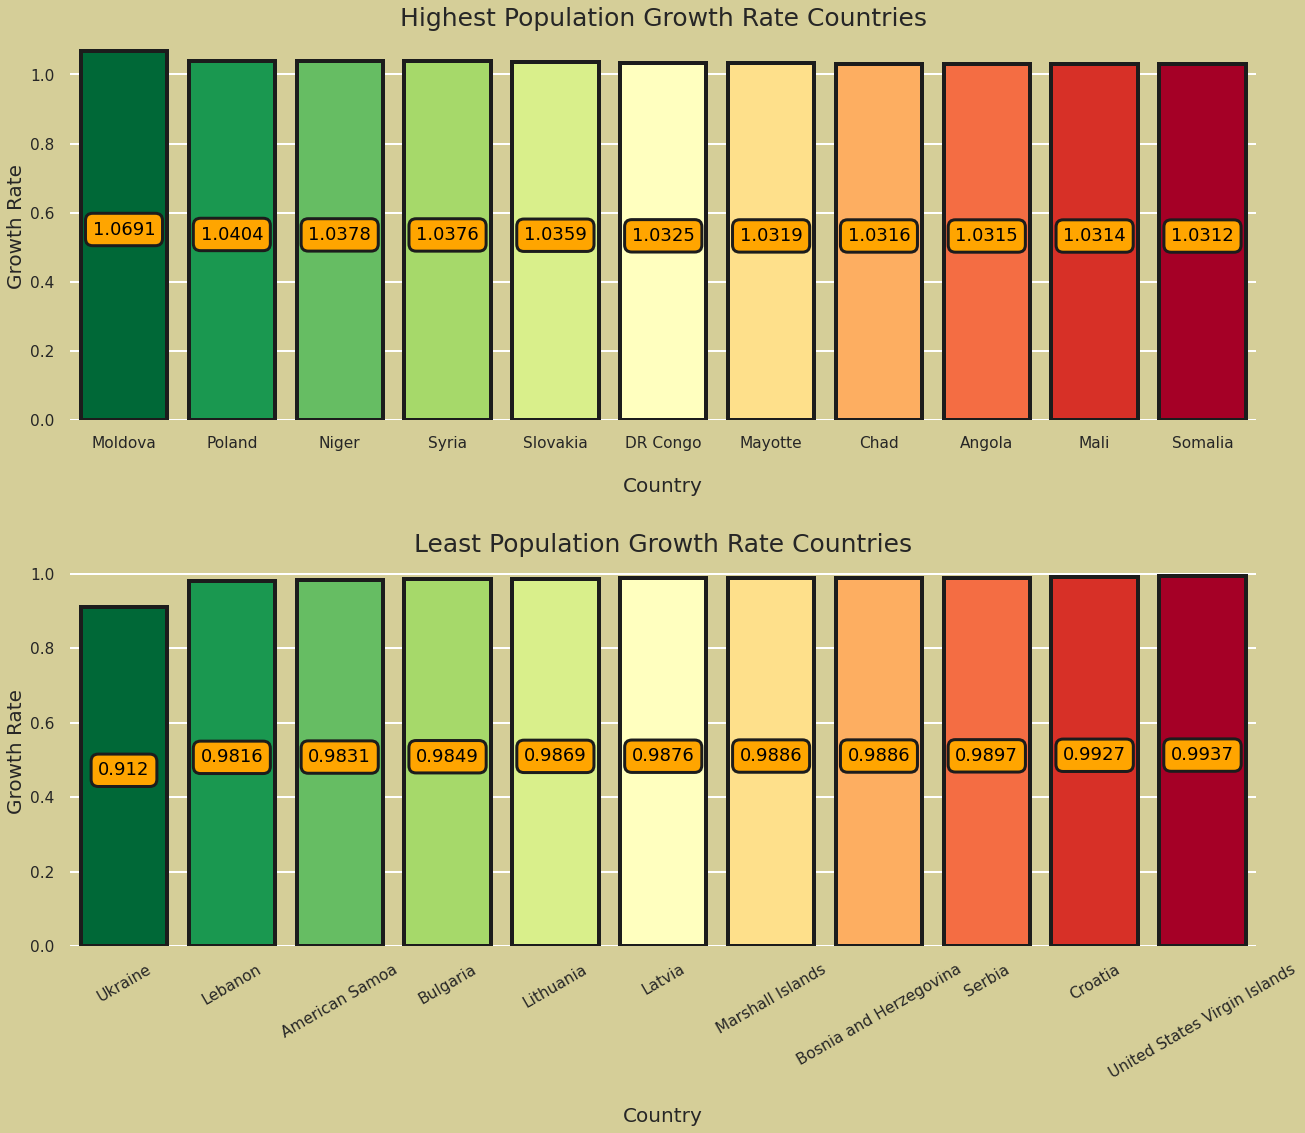

In [27]:
print(f"Let's have a look on the population growth rate :")
_, axs = plt.subplots(2,1,figsize=(20,16))
plt.tight_layout(pad=6.0)

sns.barplot(x=data["Country/Territory"],y=data["Growth Rate"],order=data.sort_values("Growth Rate",ascending=False)["Country/Territory"][:11],ax=axs[0],palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[0].set_yscale("linear")
axs[0].set_title("Highest Population Growth Rate Countries",fontsize=25)
axs[0].set_xlabel("\nCountry",fontsize=20)
axs[0].set_ylabel("Growth Rate",fontsize=20)
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 0)
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.barplot(x=data["Country/Territory"],y=data["Growth Rate"],order=data.sort_values("Growth Rate",ascending=True)["Country/Territory"][:11],ax=axs[1],palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[1].set_yscale("linear")
axs[1].set_title("Least Population Growth Rate Countries",fontsize=25)
axs[1].set_xlabel("\nCountry",fontsize=20)
axs[1].set_ylabel("Growth Rate",fontsize=20)
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 30)
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Moldova is leading in population growth rate with a growth rate of 1.0691 followed by Poland, Niger and others.
* Ukraine has the lowest population growth rate of 0.912 followed by Lebanon, American Samoa and others.

Population Growth Rate in Asia :


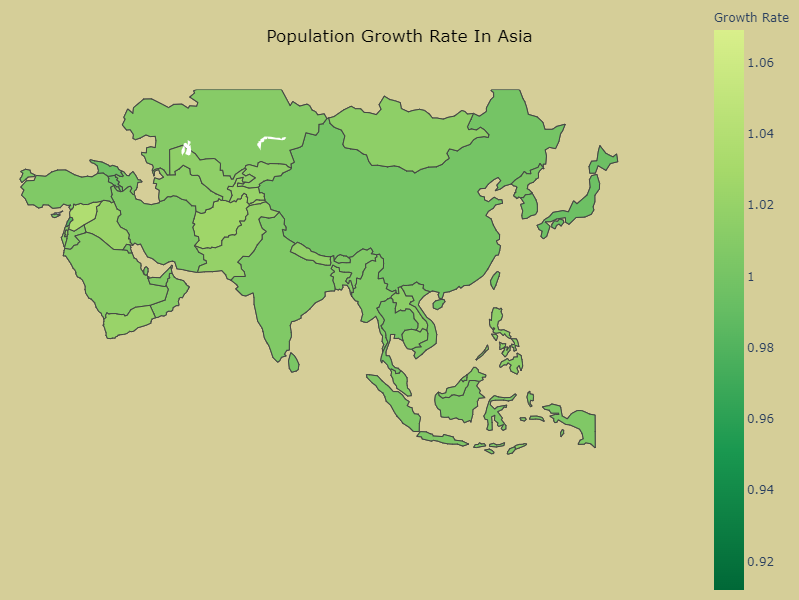

In [28]:
print("Population Growth Rate in Asia :")

fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    color_continuous_scale=palette[0:5],height= 600,scope="asia",
                    labels={"Growth Rate":"Growth Rate"})


fig.update_layout(title=dict(text= "Population Growth Rate In Asia",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

**Insights:**

* Syria is leading in Asia with a population growth rate of 1.0376 followed by Afghanistan, Palestine and other countries.

Population Growth Rate in Africa :


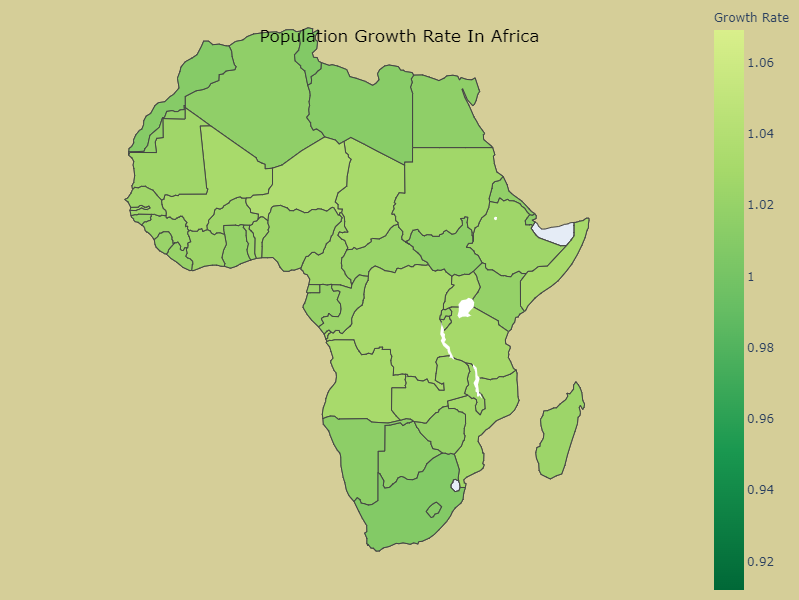

In [29]:
print("Population Growth Rate in Africa :")

fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    color_continuous_scale=palette[0:5],height= 600,scope="africa",
                    labels={"Growth Rate":"Growth Rate"})


fig.update_layout(title=dict(text= "Population Growth Rate In Africa",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

**Insights:**

* Niger is leading in Africa with a population growth rate of 1.0378 followed by DR Congo, Mayotte and other countries.

Population Growth Rate in Europe :


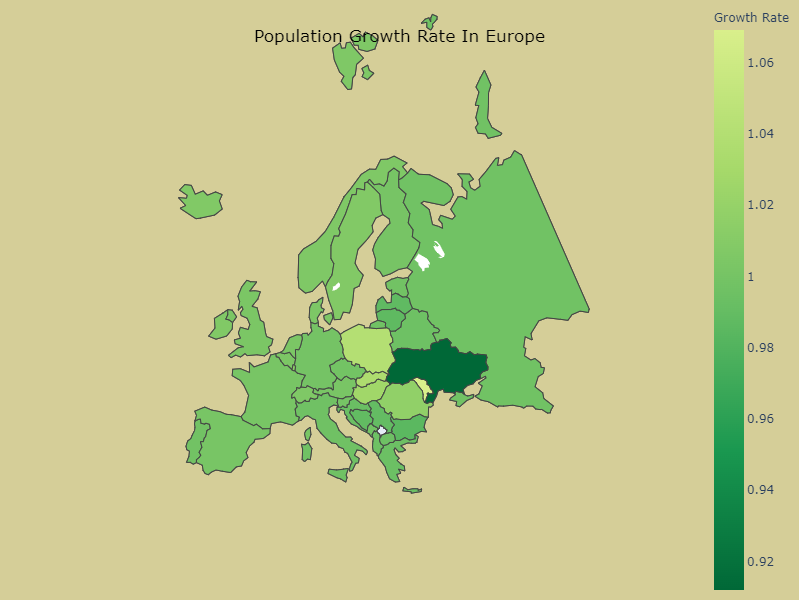

In [30]:
print("Population Growth Rate in Europe :")

fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    color_continuous_scale=palette[0:5],height= 600,scope="europe",
                    labels={"Growth Rate":"Growth Rate"})


fig.update_layout(title=dict(text= "Population Growth Rate In Europe",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

**Insights:**

* Moldova is leading in Europe with a population growth rate of 1.0691 followed by Poland, Slovakia and other countries.

Population Growth Rate in North America :


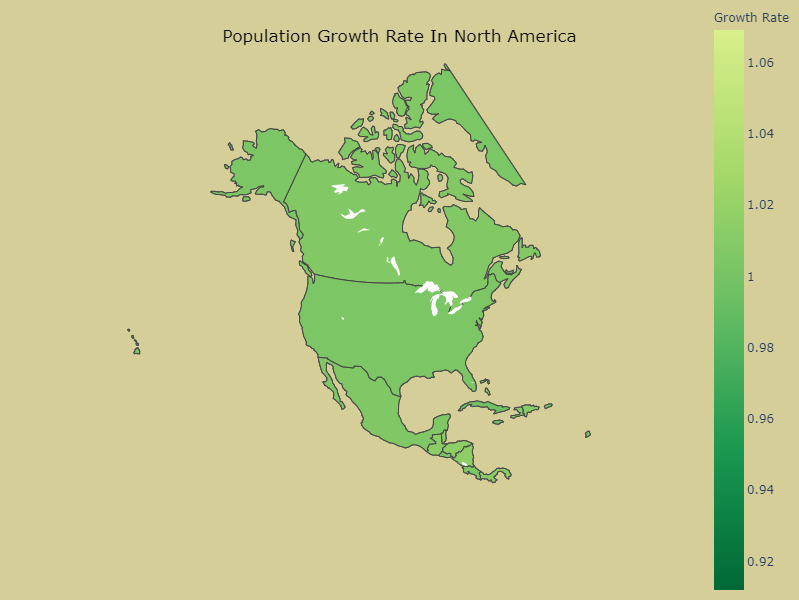

In [31]:
print("Population Growth Rate in North America :")

fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    color_continuous_scale=palette[0:5],height= 600,scope="north america",
                    labels={"Growth Rate":"Growth Rate"})


fig.update_layout(title=dict(text= "Population Growth Rate In North America",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

**Insights:**

* Honduras is leading in North America with a population growth rate of 1.015 followed by Nicaragua, Guatemala and other countries.

Population Growth Rate in South America :


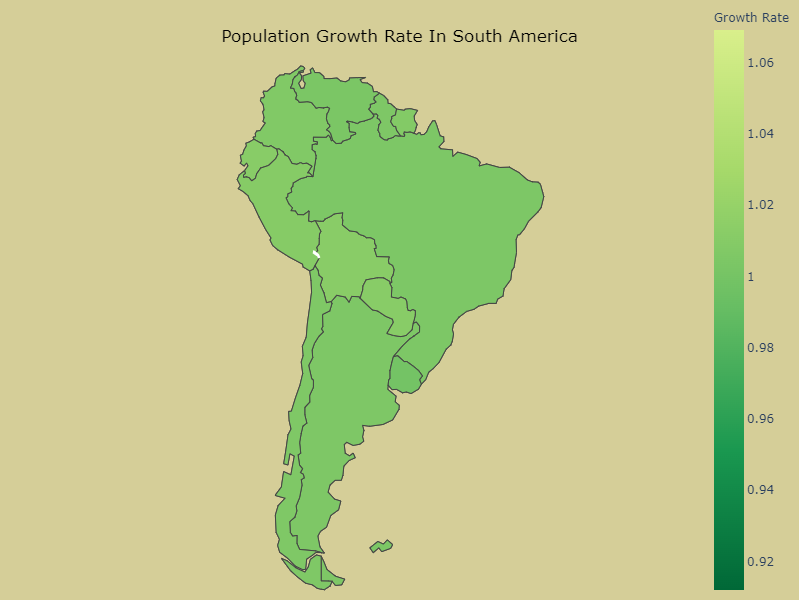

In [32]:
print("Population Growth Rate in South America :")

fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    color_continuous_scale=palette[0:5],height= 600,scope="south america",
                    labels={"Growth Rate":"Growth Rate"})


fig.update_layout(title=dict(text= "Population Growth Rate In South America",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#D5CE98",
                  paper_bgcolor="#D5CE98")

fig.show()

**Insights:**

* French Guiana is leading in South America with a population growth rate of 1.0239 followed by Bolivia, Paraguay and other countries.

Let's have a look on the continent-wise average population growth rate :


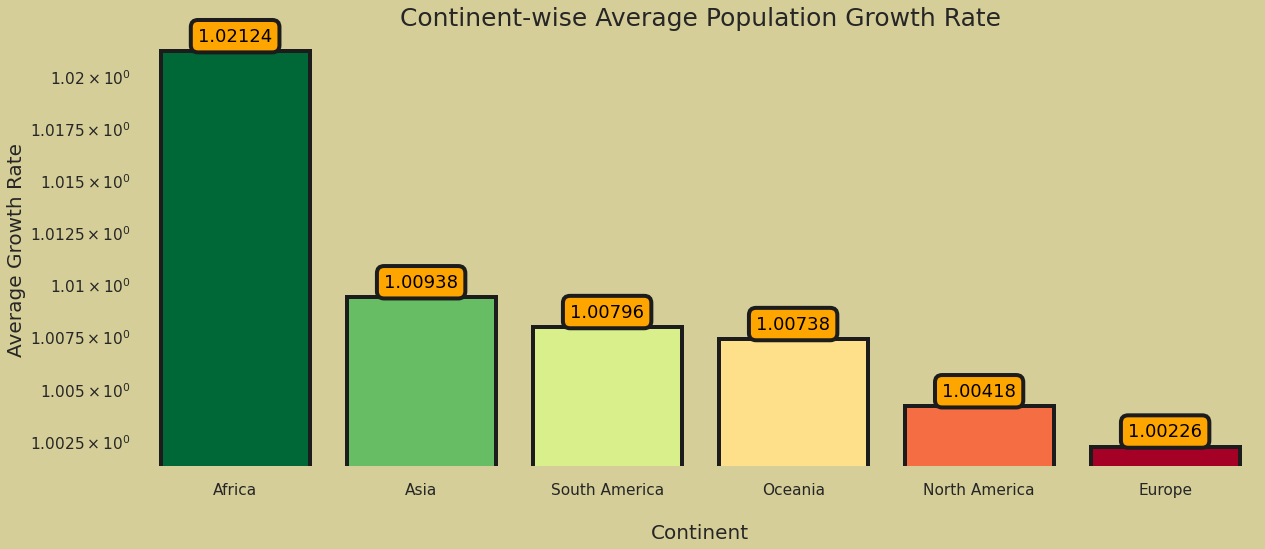

In [33]:
data_gr = data.copy()
data_gr = pd.DataFrame(data_gr.groupby(["Continent"])["Growth Rate"].mean())

print("Let's have a look on the continent-wise average population growth rate :")
plt.subplots(figsize=(20,8))
p=sns.barplot(x=data_gr.index, y=data_gr["Growth Rate"],order=data_gr.sort_values("Growth Rate",ascending=False).index,palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Continent-wise Average Population Growth Rate",fontsize=25)
p.set_xlabel("\nContinent",fontsize=20)
p.set_ylabel("Average Growth Rate",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Africa is leading in average population growth rate with a growth rate of 1.02124 followed by Asia, South America and others.
* Europe has the lowest average population growth rate of 1.00226 

<a id="9"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Country Rank</p>

In [34]:
def rank(feature,color):
    
    _, axes = plt.subplots(figsize=(20,8))
    sns.kdeplot(x=data[data["Continent"]==feature]["Rank"], y=data["2022 Population"],edgecolor="#1c1c1c",fill=True, kind="kde",shade=False,height=10,color=color)
    axes.set_title(f"\nCountry Rank Distribution [{feature}]\n",fontsize=25)
    axes.set_ylabel("Population",fontsize=20)
    axes.set_xlabel(f"\nCountry Rank [{feature} Continent]",fontsize=20)
    
    sns.despine(left=True, bottom=True)
    plt.show()

Let's have a look on the distribution of asian country rank :


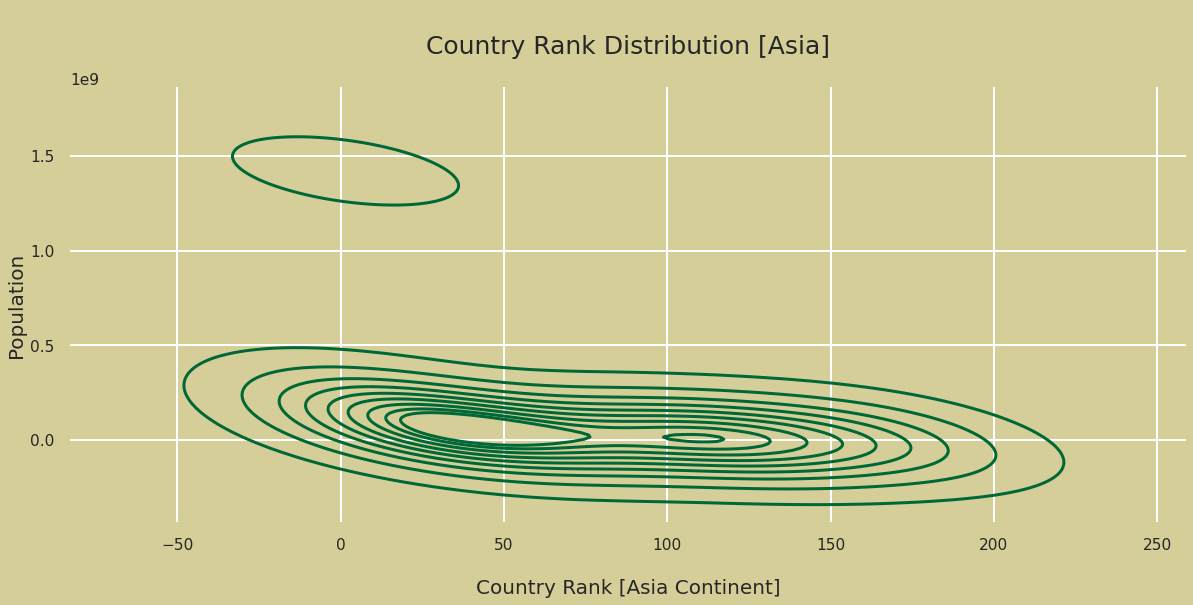

In [35]:
print("Let's have a look on the distribution of asian country rank :")
rank("Asia",palette[0])

**Insights:**

* Most countries rank in Asia fall in between 0 to 75 and in between 100 to 130.


Let's have a look on the distribution of african country rank :


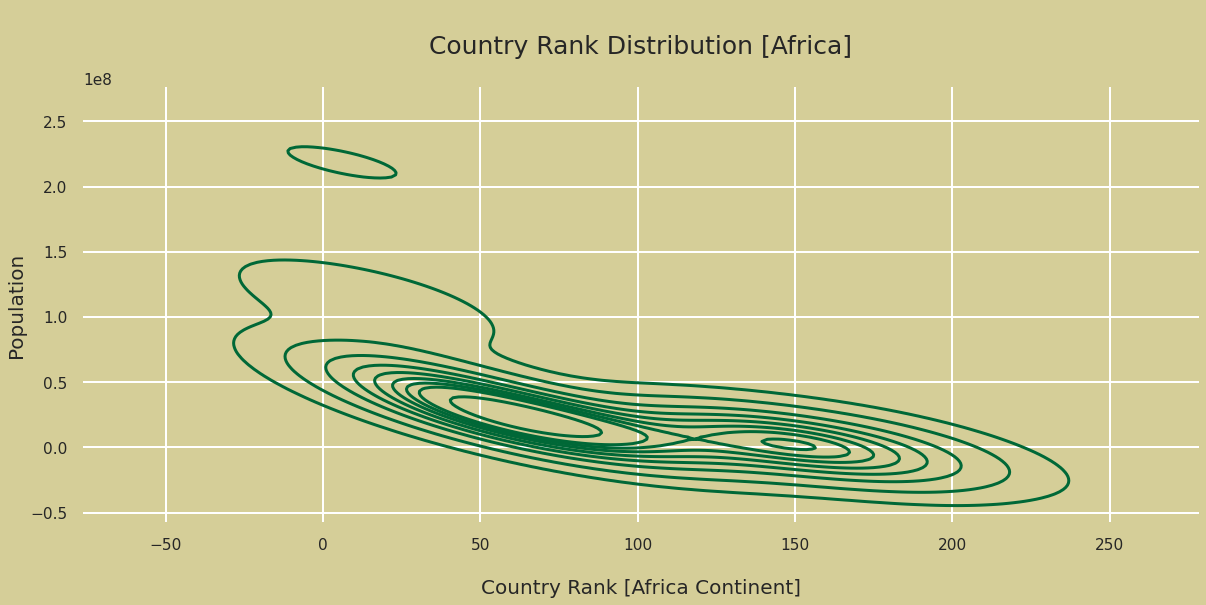

In [36]:
print("Let's have a look on the distribution of african country rank :")
rank("Africa",palette[0])

**Insights:**

* Most countries rank in Africa fall in between 6 to 85 and others are scattered.

Let's have a look on the distribution of european country rank :


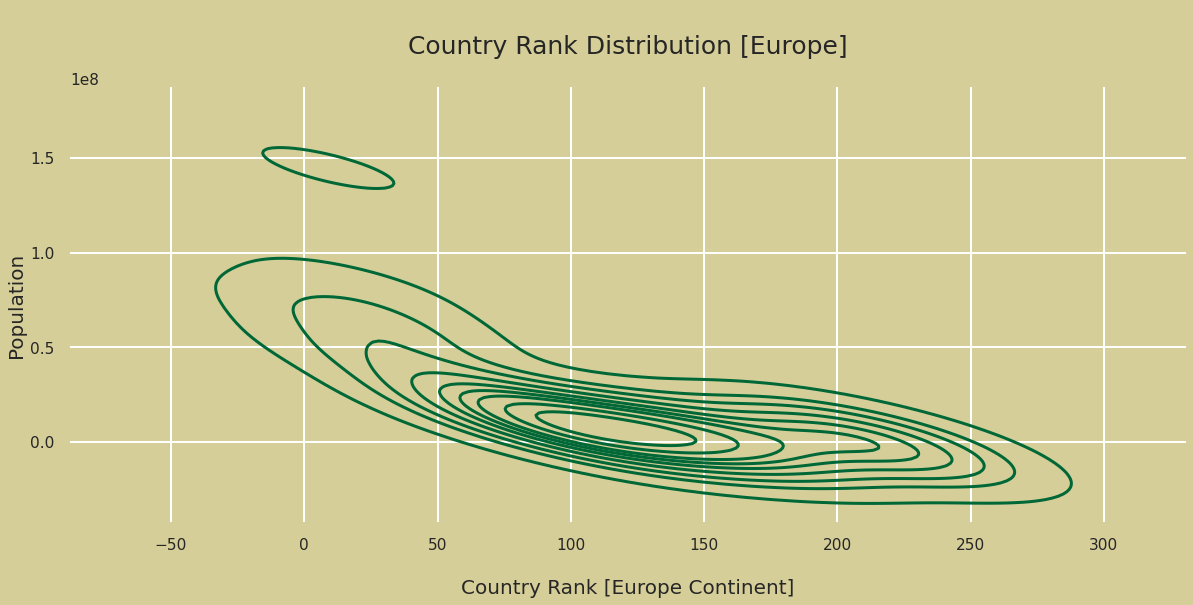

In [37]:
print("Let's have a look on the distribution of european country rank :")
rank("Europe",palette[0])

**Insights:**

* Most countries rank in Europe fall in between 60 to 160 and others are scattered.

Let's have a look on the distribution of north american country rank :


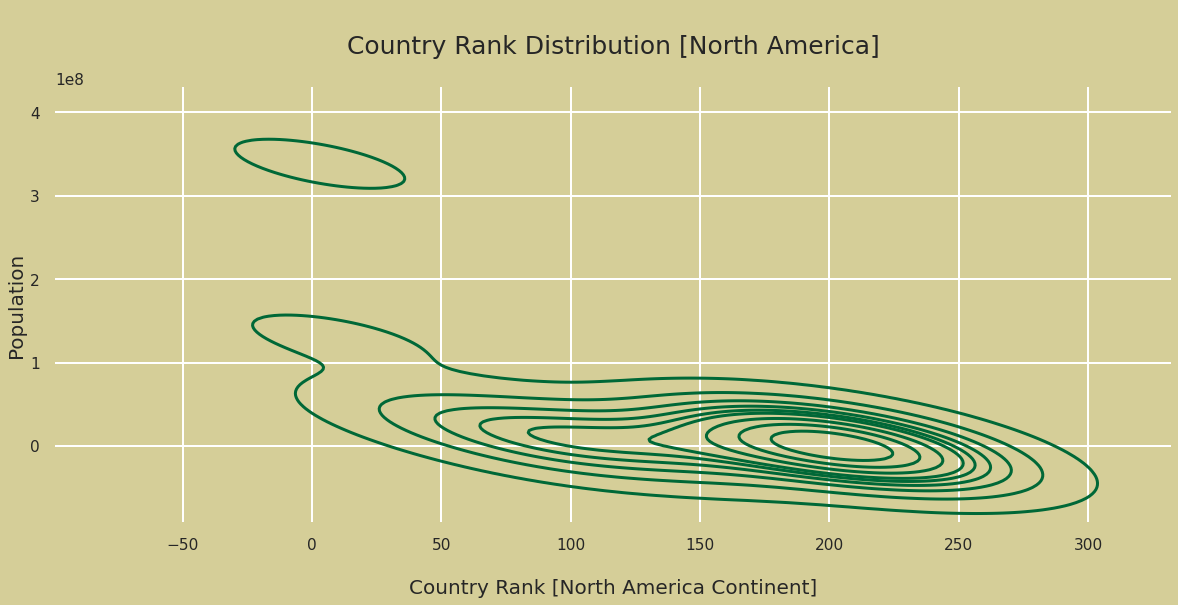

In [38]:
print("Let's have a look on the distribution of north american country rank :")
rank("North America",palette[0])

**Insights:**

* Most countries rank in North America fall in between 170 to 230 and others are scattered.

Let's have a look on the distribution of south american country rank :


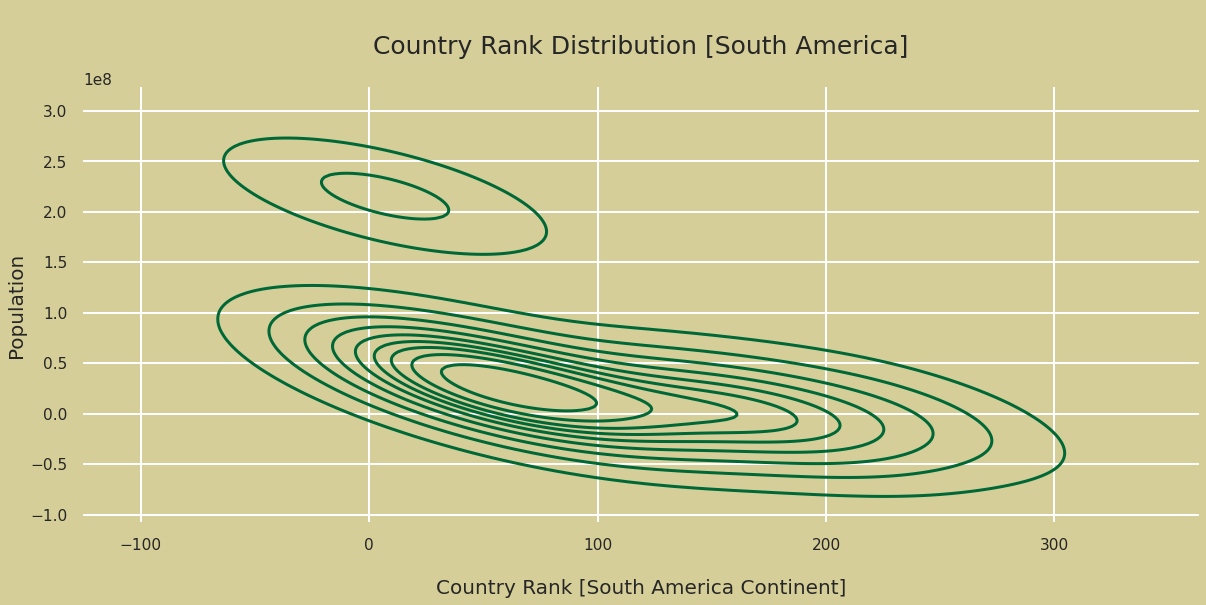

In [39]:
print("Let's have a look on the distribution of south american country rank :")
rank("South America",palette[0])

**Insights:**

* Most countries rank in South America fall in between 20 to 110 and others are scattered.

Let's have a look on the distribution of oceanian country rank :


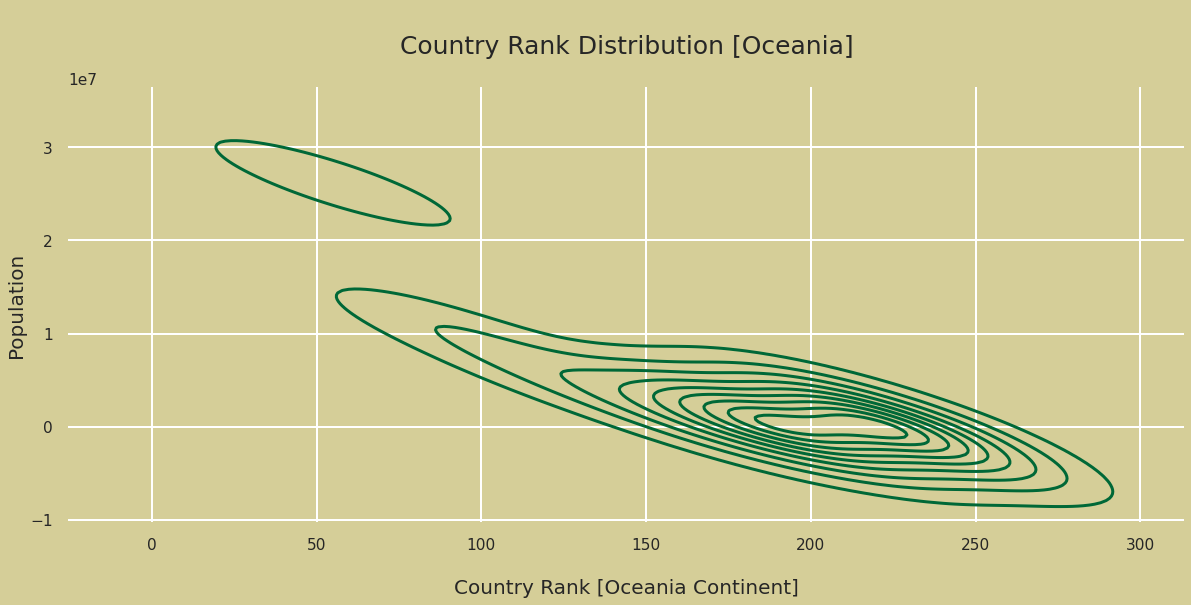

In [40]:
print("Let's have a look on the distribution of oceanian country rank :")
rank("Oceania",palette[0])

**Insights:**

* Most countries rank in Oceania fall in between 180 to 230 and others are scattered.

<a id="10"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Correlation Map</p>

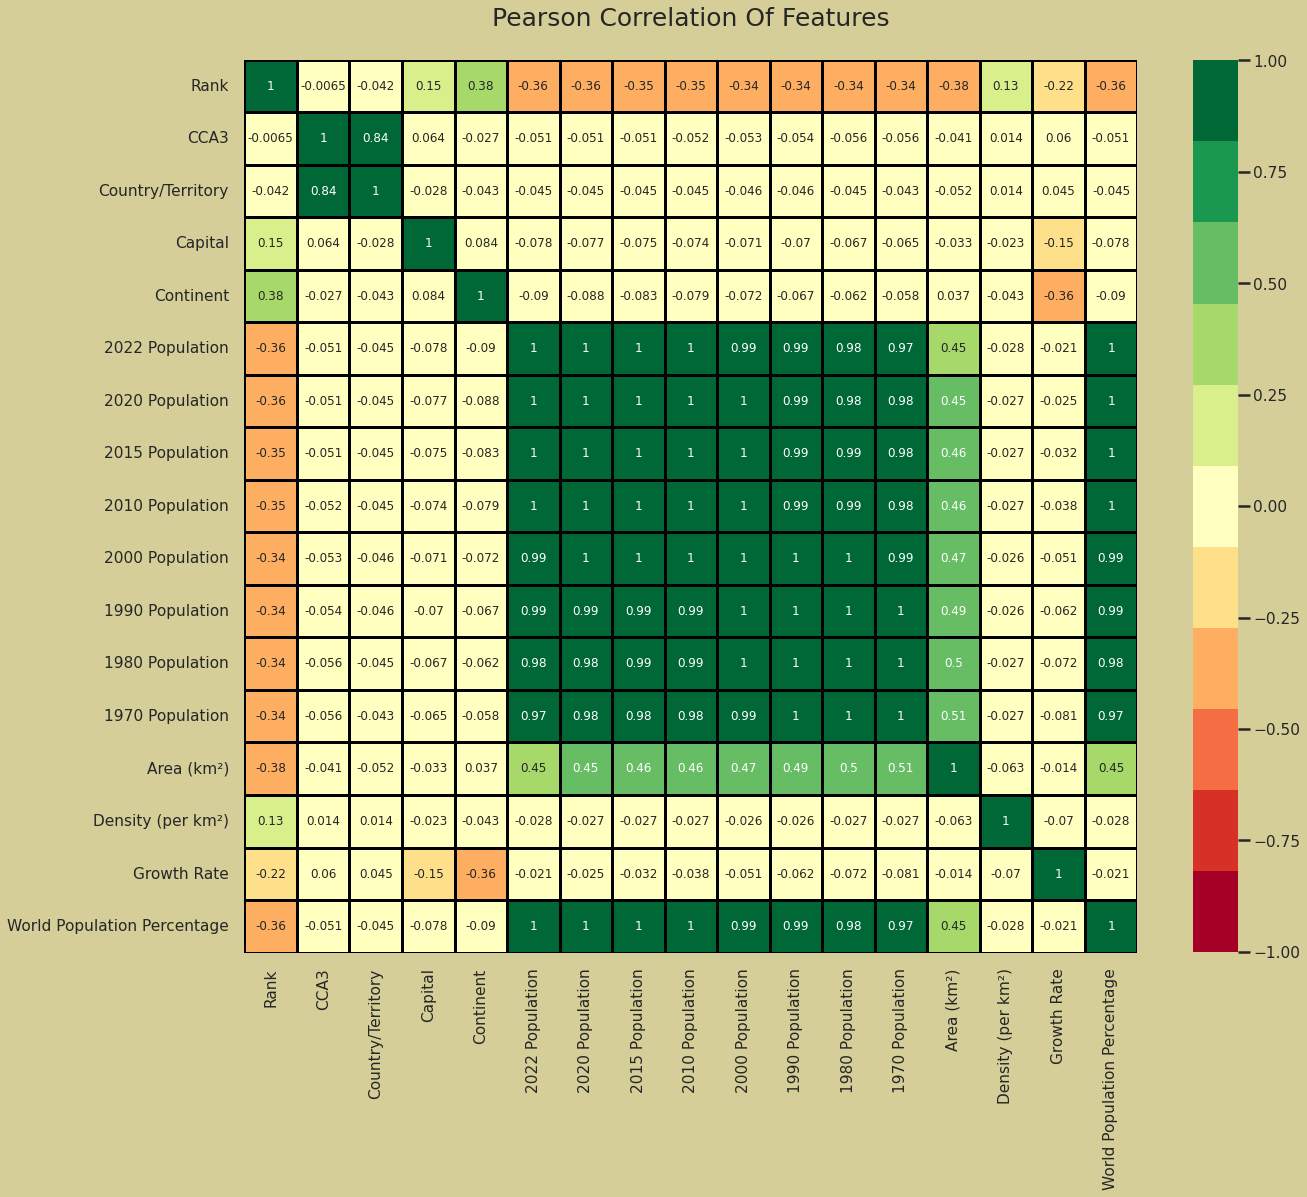

In [41]:
catcol = ["CCA3","Country/Territory","Capital","Continent"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(20, 20))

sns.heatmap(data.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='black',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

**Insights:**

* High correlation between population and world population percentage. Also high correlation between country and CCA3 code as expected. 
* Medium correlation between area and population, area and world population percentage.
* Medium inverse correlation between growth rate and continent, rank and world population percentage, rank and area, rank and population.

<a id="11"></a>
# <p style="padding:10px;background-color:#006837;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You</p>



<p>
<h3><font color="#006837">If you liked this notebook please upvote. Your feedback will be highly appreciated.</font></h3>

<br>

<h4><b>Author :</b></h4>

<h3>Hasib Al Muzdadid</h3>

<b>👉Shoot me mails :</b> muzdadid@gmail.com<br>
<b>👉Connect on LinkedIn :</b> https://www.linkedin.com/in/hasibalmuzdadid <br>
<b>👉Explore Github :</b> https://github.com/HasibAlMuzdadid    
    
</p> 